# Introduction
.
.
.

In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [320]:
df = pd.read_csv("../data/Womens Clothing E-Commerce Reviews.csv",sep=",",index_col="Unnamed: 0")
df_backup = df.copy()

### Understanding Database

In [321]:
print(f"Shape: {df.shape}")
print("\n")
print(f"Null Columns;\n{df.isnull().sum()}")
print("\n")
print(df.info())

Shape: (23486, 10)


Null Columns;
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null

### Cleaning Database

In [322]:
# Function to remove NaN values
def drop_missing_values(data,column):
    if data[column].isnull().sum() > 0:
        data = data[data[column].isnull() != True]
    else:
        pass
    return data

In [323]:
nan_columns = ["Division Name","Department Name","Class Name"]

for column in nan_columns:
    df = drop_missing_values(df,column)

In [324]:
'''
Delete records for Age for below 18 YO and above 70 YO.
'''

'\nDelete records for Age for below 18 YO and above 70 YO.\n'

#### Data Wrangling

In [326]:
# Creating a new column for binning age

interval = [18,30,40,50,60,70]
df["Age_Range"] = pd.cut(df["Age"],bins=interval_1,retbins=False) 

In [280]:
'''
Use this category for hue
'''

'\nUse this category for hue\n'

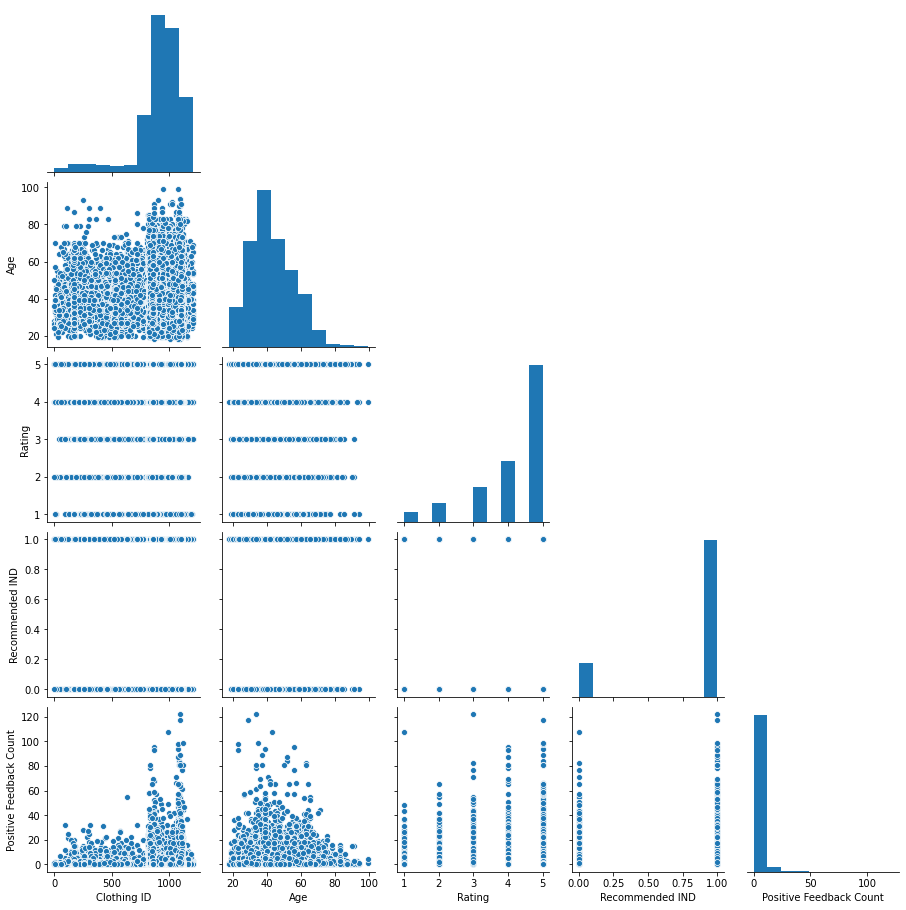

In [210]:
sns.pairplot(df,corner=True)

In [219]:
df.groupby("Class Name")["Rating"].mean().sort_values(ascending=False)

Class Name
Casual bottoms    4.500000
Layering          4.376712
Jeans             4.360942
Lounge            4.301013
Jackets           4.295455
Sleep             4.285088
Intimates         4.279221
Legwear           4.278788
Pants             4.265850
Fine gauge        4.260909
Shorts            4.255521
Skirts            4.245503
Outerwear         4.198171
Swim              4.197143
Sweaters          4.179272
Knits             4.161677
Blouses           4.154020
Dresses           4.150815
Chemises          4.000000
Trend             3.815126
Name: Rating, dtype: float64

In [220]:
df.groupby("Division Name")["Rating"].mean().sort_values(ascending=False)

Division Name
Initmates         4.286285
General Petite    4.211084
General           4.176606
Name: Rating, dtype: float64

In [221]:
df.groupby("Department Name")["Rating"].mean().sort_values(ascending=False)

Department Name
Bottoms     4.288760
Intimate    4.280115
Jackets     4.264535
Tops        4.172239
Dresses     4.150815
Trend       3.815126
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating'>

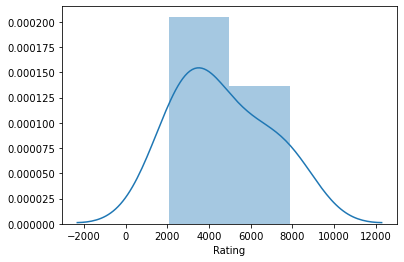

In [295]:
sns.distplot(df.groupby("Age_Range")["Rating"].count().sort_values(ascending=False))

In [341]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age_Range
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"(30.0, 40.0]"
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"(30.0, 40.0]"
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"(50.0, 60.0]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"(40.0, 50.0]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"(40.0, 50.0]"
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"(30.0, 40.0]"
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"(40.0, 50.0]"
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"(30.0, 40.0]"
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"(18.0, 30.0]"


In [334]:
pv1 = pd.pivot_table(df,columns="Age_Range",values="Rating",aggfunc="mean").T
pv1

,Rating
Age_Range,
"(18.0, 30.0]",4.191477
"(30.0, 40.0]",4.166203
"(40.0, 50.0]",4.166017
"(50.0, 60.0]",4.245758
"(60.0, 70.0]",4.291201
nan,4.268229


In [336]:
pv1.reset_index()["Age_Range"].dtype

dtype('O')

In [327]:
'''
trying to create a plot by using hue parameter..
'''

df["Age_Range"] = df["Age_Range"].astype("str")

In [342]:
sns.relplot(df["Rating"],df["Age"],hue="Class_Name")

ValueError: Could not interpret input 'Class_Name'

In [294]:
df.groupby("Age_Range")["Rating"].count().sort_values(ascending=False)

Age_Range
(30, 40]    7906
(40, 50]    5903
(50, 60]    3890
(18, 30]    3332
(60, 70]    2057
Name: Rating, dtype: int64

In [230]:
df["Age"].sort_values(ascending=False)

8327     99
11545    99
18563    94
18036    94
6543     94
         ..
8627     19
19704    18
22390    18
8858     18
22364    18
Name: Age, Length: 23472, dtype: int64

In [240]:
df[df["Age"] > 90].value_counts().sum()

8